# sense time vis

# imports

In [1]:
import sys
import cv2
import time
import glob
import itertools
sys.path.append("../../../")

%run ../../../ac/images/filters/filters.py
%run ../../../ac/visualizer/plotter.py
%run ../../../ac/common/jsons.py
%run ../../../ac/images/orientations.py

# rotate image

In [ ]:
# img_path = "/home/chy/f.jpg"
# img = cv2.imread(img_path)
# rot_img = rotate_image_right_angle(img, 180)
# show_image(rot_img)
# cv2.imwrite("/home/chy/r.jpg", rot_img)

# resources

In [2]:
sen_path = "/media/chy/1326657F605F16F2/bench/"

# img & meta

In [3]:
jsons = glob.glob("{}/s1.json".format(sen_path))
json_to_img = [(json_path, json_path.replace('json', 'jpg')) for json_path in jsons]
print(len(json_to_img))

1


# vis

In [4]:
def draw_landmark(ax, js):
#     for i, dic in enumerate(js['st_landmark']):
#         x, y = dic['x'], dic['y']
#         ax.scatter(x, y, c='green', marker='D', s=15)
#         ax.annotate("{}".format(i), (x, y))

    for i, dic in enumerate(js['st_detail_landmarks']):
        x, y = dic['x'], dic['y']
        ax.annotate("{}".format(i), (x, y))
        ax.scatter(x, y, c='green', marker='D', s=15)

    for dic in js['st_eye_contour']:
         ax.scatter(dic['x'], dic['y'], c='purple', marker='D', s=10)
            
#     for dic in js['st_eye_center']:
#         ax.scatter(dic['x'], dic['y'], c='blue', marker='D', s=10)

In [5]:
def vis(jip):
    json_path, img_path = jip
    js = load_json(json_path)
    img = cv2.imread(img_path)
    img = bgr_to_rgb(img)
    
    fig = plt.figure(figsize=(25, 25))
    ax = fig.add_subplot(111)
    plt.imshow(img)
    draw_landmark(ax, js)

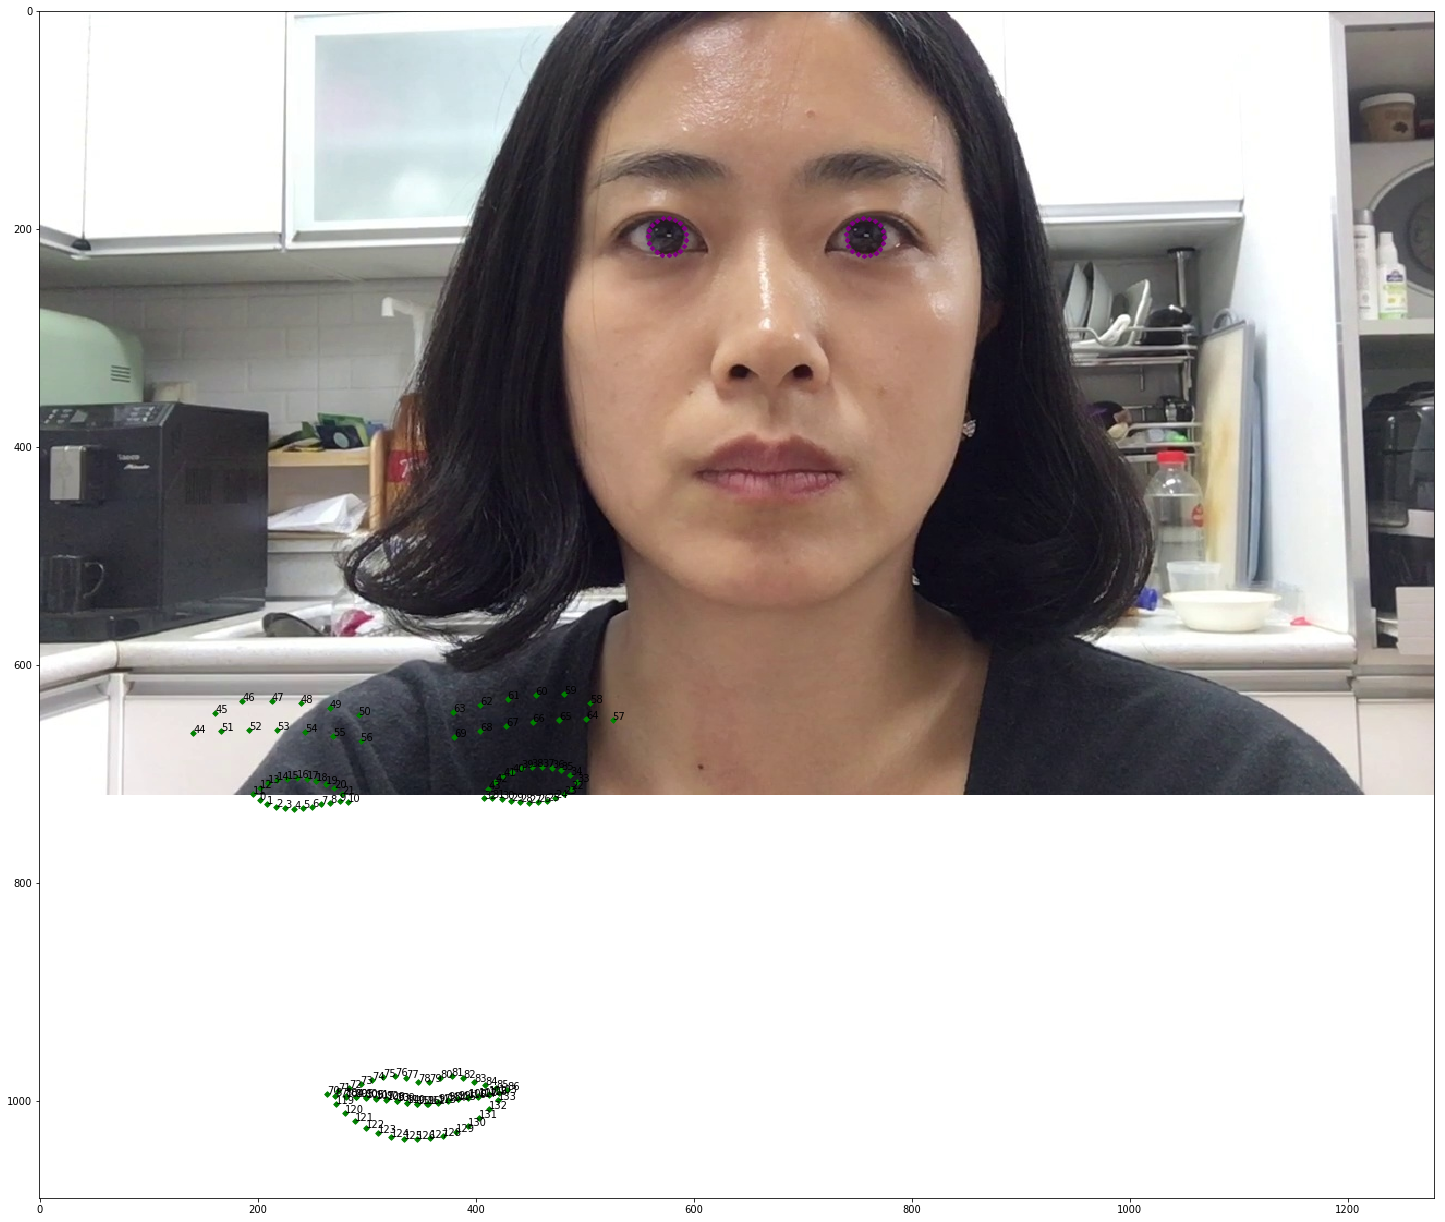

In [7]:
for jip in json_to_img:
    vis(jip)